# Scikit Learn perceptron

In this exercise, we will use the tools provided by _Scikit-Learn_, which provides powerful modules to implement machine learning models using <tt>Python</tt>; more about them on the [official website](https://scikit-learn.org) or in their [GitHib](https://github.com/scikit-learn/scikit-learn). Particularly in this notebook, we will follow the instructions provided on their [course](https://python-course.eu/machine-learning/perceptron-class-in-sklearn.php).

Scikit will give the possibility of tackling training and testing of the model in three major parts: 

1. __Choosing the model.__ Here we can choose which mode to use and how to set up it. There is a huge list of settings we can choose, see the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html).

2. __Train the model.__

3. __Test the model.__

<!-- 1. choose the model, we did pefore choosing perceptron, instanciate the model as random state to make it deterministinc, shuffling data we use random generator to shuffle the indexes of matrix i.e. in the mini match
2. second step is to train he model


use of matplotlib, with plot function we can call subplots function which returns the handles of t fariables, figure and axixs. we can use the ax variable. data of label 0, 1 or 2. For x axis and y axis we caloate and sample 0 ponts. Almosta identitca to the ting we did manually -->

## Set up the model

The function we will use to set up the data set is called <tt>make_blobs</tt> where we can specify loads of parameters and will return the data and the labels. Particularly we define the number of samples <tt>n_samples</tt>, the <tt>center</tt> of each of the classes: in this case, there are three centers so the classes are 3. But we can increase or decrease the number of classes based on how many center points we insert. Then, using the <tt>cluster_std</tt> we specify the standard deviation for each class. Finally, we set the seed of the random generation using <tt>random_state</tt>.

After generating the dataset, we plot the classes by scattering the points.

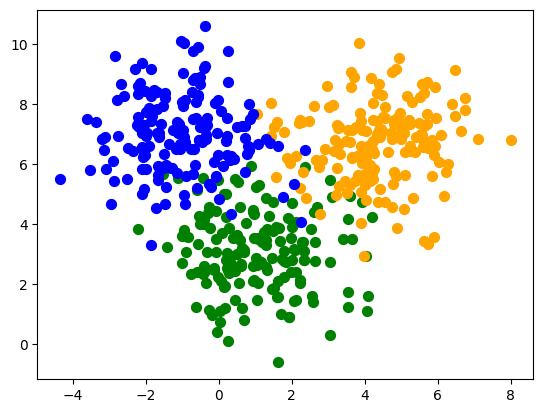

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

n_samples = 500

# generates data and labels
data, labels = make_blobs(n_samples = n_samples, 
                            centers = ([1.1, 3], [4.5, 6.9], [-1, 7]), # center of the classes
                            cluster_std = 1.3,  # standard deviation for the classes
                            random_state = 0)   # seed


colours = ('green', 'orange', 'blue', 'red')
fig, ax = plt.subplots()

for n_class in range(3):
    ax.scatter(data[labels == n_class][:, 0], 
               data[labels == n_class][:, 1], 
               c = colours[n_class], 
               s = 50, 
               label = str(n_class))

### Split the dataset

After generating the dataset it is important to split it: this part is related to the model evaluation. Particularly, the dataset will be split into two parts: the training subset and the test subset. The first one will be used only for training the model and the second one will be used to test and evaluate how the model trained: this is because the main goal of machine learning is to perform well on the things the model never saw before.  

By importing the <tt>train_test_split</tt> function we can decide the percentage of the dataset that will be used to train and test the model. The most common percentages are 80\% for the training and 20\% for the test (like in this case) or 70\% and 30\%. There is no ideal splitting but it is suggested that with a huge dataset it is also possible to do half and half.


In [2]:
from sklearn.model_selection import train_test_split

# splits the dataset
datasets = train_test_split(data,
                            labels,
                            test_size = 0.20)

# defines the four sets
train_data, test_data, train_labels, test_labels = datasets

## Training part

The training part of the model is computed through the <tt>fit</tt> of the <tt>Perceptron</tt> package. The only thing needed for training the model is the model itself and the training data and labels.


In [3]:
from sklearn.linear_model import Perceptron

p = Perceptron(random_state = 42)

# train the model
p.fit(train_data, train_labels)

Perceptron(random_state=42)

## Testing part

After training the model we will evaluate it by using the test subset. The interesting part is not the actual _scores_ but the __prediction__ part.

The test part generally is more computationally liter than the training part, except for some cases like the  _K-Nearest Neighbors_ which essentially trains on the flight during the test. The output of the prediction function is a vector of labels that will be compared with the actual true labels.

In this particular case, the score is calculated using the __accuracy__ function but can be also used the _recall_ or the _precision_ metric.

The fact that the splitting phase is not deterministic, each time we train the model we will get a different score. This might represent a problem because we do not know what is the true score (accuracy): it is the same model with the same data and the same splitting dimension but has a different score each time.

<!-- Neer ask to compute the accuracy of accuracy. It is useless. Not interest in this value, we already know we can buld classifier and a perfect regressor aon a traingin daata. -->

In [4]:
from sklearn.metrics import accuracy_score

# predictions
predictions_train = p.predict(train_data)
predictions_test = p.predict(test_data)

train_score = accuracy_score(predictions_train, train_labels)
print("score on train data: ", train_score)     # this value is not very useful

test_score = accuracy_score(predictions_test, test_labels)
print("score on test data: ", test_score)

score on train data:  0.855
score on test data:  0.89


### Evaluation

Other than the accuracy we might be interested also in other metrics such as __recall__ and __precision__. To do so we will be using the <tt>classification_report</tt> function that gives us a lot of information. 

Because this is a __multi-class classification__ problem the metrics are computed for every of the classes. The metrics provided are:

* _precision_, which is the fraction of all the times class $i$ was correctly labeled out of all the times a class was labeled as class $i$, even if it was not actually class $i$ (it is the column $i$ of the confusion matrix).

* _recall_, which is the ratio of all the times class $i$ was correctly labeled out of all the times class $i$ was labeled in a class (it is the row $i$ of the confusion matrix).


* _f1-score_ which essentially is a weighted average between the recall and the precision and pulls the result towards the lower value, so in this metric the lower value between the two is the one which weights more

* _support_ that denotes the number of points per class 

Then, after providing these values for each class, the <tt>classification_report</tt> provides an overall value of the accuracy and then two types of average for each class:

1. The __macro average__ is the normal arithmetical average defined as $\frac{1}{N}\sum_i^N R_i$ where N is the total number of classes and $R$ is the recall value but can be substituted with the precision or the f1-score

1. The _weighted average_, also known as __micro average__ is the average of these metrics based on the frequency of the class, so in this case the total number of points per class, denoted as _support_. Given $M$ points and $m_i < M$ points per class, we can define this average as $ \frac{1}{M}\sum_i^N m_iR_i $

In [5]:
from sklearn.metrics import classification_report

print(classification_report(predictions_test, test_labels))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        37
           1       0.74      1.00      0.85        28
           2       0.97      0.80      0.88        35

    accuracy                           0.89       100
   macro avg       0.90      0.90      0.89       100
weighted avg       0.91      0.89      0.89       100

